In [11]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid
from mesa.visualization import SolaraViz, SpaceRenderer, make_plot_component
from mesa.visualization.components import AgentPortrayalStyle

In [12]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B


class MoneyAgent(CellAgent):
    

    def __init__(self, model, cell):
        
        super().__init__(model)
        self.cell = cell
        self.wealth = 1

    def move(self):
        
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        
        cellmates = [a for a in self.cell.agents if a is not self]

        if cellmates:  # Only give money if there are other agents present
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

    def step(self):
        
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(mesa.Model):
    

    def __init__(self, n=10, width=10, height=10, seed=None):
        
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = OrthogonalMooreGrid((width, height), random=self.random)

        
        MoneyAgent.create_agents(
            self,
            self.num_agents,
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

        self.datacollector = mesa.DataCollector(
            model_reporters={"Gini": compute_gini}, agent_reporters={"Wealth": "wealth"}
        )
        self.datacollector.collect(self)

    def step(self):
        
        self.agents.shuffle_do("step")
        self.datacollector.collect(self)

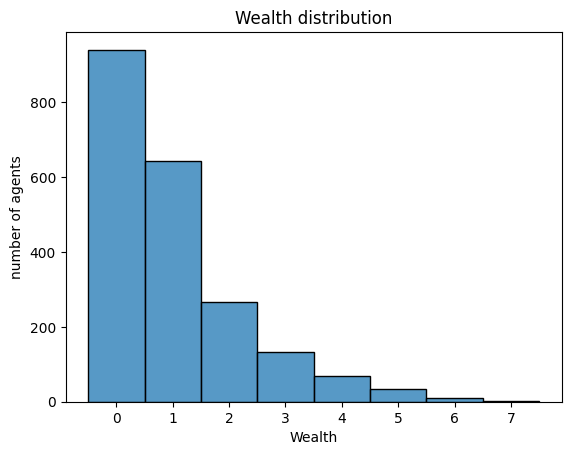

In [13]:
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()


data = model.datacollector.get_agent_vars_dataframe()

g = sns.histplot(data["Wealth"], discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

In [14]:
model_params = {
    "n": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

In [15]:
plot_comp = make_plot_component("encoding", page=1)

In [17]:
@solara.component
def CustomComponent():
    ...

page = SolaraViz(
    model,
    renderer,
    components=[(CustomComponent, 1)]  # Custom component will appear on page 1
)

NameError: name 'solara' is not defined

In [18]:
def agent_portrayal(agent):
    portrayal = AgentPortrayalStyle(size=50, color="orange")
    if agent.wealth > 0:
        portrayal.update(("color", "blue"), ("size", 100))
    return portrayal


# Create initial model instance
money_model = MoneyModel(n=50, width=10, height=10)

In [19]:
%%capture

renderer = SpaceRenderer(model=money_model, backend="matplotlib")
renderer.draw_structure(lw=2, ls="solid", color="black", alpha=0.1)
renderer.draw_agents(agent_portrayal)

In [20]:
%%capture

renderer = SpaceRenderer(model=money_model, backend="altair")
renderer.draw_structure(
    xlabel="x",
    ylabel="y",
    grid_width=2,
    grid_dash=[1],
    grid_color="black",
    grid_opacity=0.1,
    title="Boltzmann Wealth Model",
)
renderer.draw_agents(agent_portrayal)

In [21]:
def post_process(ax):
    """Customize the matplotlib axes after rendering."""
    ax.set_title("Boltzmann Wealth Model")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.set_aspect("equal", adjustable="box")


renderer.post_process = post_process

In [22]:
def post_process(chart):
    """Customize the Altair chart after rendering."""
    chart = (
        chart.properties(
            title="Boltzmann Wealth Model",
            width=600,
            height=400,
        )
        .configure_axis(
            labelFontSize=12,
            titleFontSize=14,
        )
        .configure_title(fontSize=16)
    )
    return chart


renderer.post_process = post_process

In [23]:
def post_process_lines(ax):
    """Customize the matplotlib axes for the Gini line plot."""
    ax.set_title("Gini Coefficient Over Time")
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Gini Coefficient")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.set_aspect("auto")


GiniPlot = make_plot_component("Gini", post_process=post_process_lines)

In [25]:
page = SolaraViz(
    money_model,
    renderer,
    components=[GiniPlot],
    model_params=model_params,
    name="Boltzmann Wealth Model",
)

# This is required to render the visualization in a Jupyter notebook
page

Component react.component(solara.components.figure_altair.FigureAltair) raised exception KeyError("application/vnd.vegalite.v4+json and application/vnd.vegalite.v5+json not in mimebundle:\n\n{'application/vnd.vegalite.v6.json': {'config': {'view': {'continuousWidth': 300, 'continuousHeight': 300, 'stroke': 'black', 'strokeWidth': 1.5}, 'axis': {'labelFontSize': 12, 'titleFontSize': 14}, 'title': {'fontSize': 16}}, 'layer': [{'data': {'name': 'data-4f53cda18c2baa0c0354bb5f9a3ecbe5'}, 'mark': {'type': 'point', 'opacity': 0}, 'encoding': {'x': {'axis': {'grid': True, 'gridColor': 'black', 'gridDash': [1], 'gridOpacity': 0.1, 'gridWidth': 2}, 'field': 'X', 'scale': {'domain': [-0.5, 9.5], 'nice': False}, 'title': 'x', 'type': 'quantitative'}, 'y': {'axis': {'grid': True, 'gridColor': 'black', 'gridDash': [1], 'gridOpacity': 0.1, 'gridWidth': 2}, 'field': 'Y', 'scale': {'domain': [-0.5, 9.5], 'nice': False}, 'title': 'y', 'type': 'quantitative'}}, 'title': 'Boltzmann Wealth Model'}, {'data'

Cannot show ipywidgets in text